# **Project: Spotify Song Popularity Prediction**

## Description & Deliverables

In this project my aim is to create a song popularity prediction  based on certain attribure that will be determine by analysing all the variables. 



## Business Understanding

I want to assume that the Platform want to determine if the song will be a hit or before promoting it to user. That system will definetely help the platform to be more reliable to it's user. Next, let's assume that they have a question: What's Likely to Make a Song Become Popular

The goal in this project is to analyze spotify data that i take from kaggle as reference and build a model to predict whether or not a song will be popular or not. 




| Variable           | Description                                      |
|--------------------|--------------------------------------------------|
| id                 | Unique identifier for the track                  |
| name               | Name of the track                                |
| popularity         | Popularity score for the track (0–100)           |
| duration_ms        | Duration of the track in milliseconds            |
| explicit           | Indicates if the track has explicit content (0 or 1) |
| artists            | List of artist names associated with the track   |
| id_artists         | List of unique identifiers for each artist       |
| release_date       | Release date of the track                        |
| danceability       | Danceability score of the track (0.0–1.0)        |
| energy             | Energy score of the track (0.0–1.0)              |
| key                | The key the track is in (0–11)                   |
| loudness           | Loudness of the track in decibels (dB)           |
| mode               | Modality of the track (major is 1 and minor is 0) |
| speechiness        | Speechiness score of the track (0.0–1.0)         |
| acousticness       | Acousticness score of the track (0.0–1.0)        |
| instrumentalness   | Instrumentalness score of the track (0.0–1.0)    |
| liveness           | Liveness score of the track (0.0–1.0)            |
| valence            | Valence score of the track (0.0–1.0)             |
| tempo              | Tempo of the track in beats per minute (BPM)     |
| time_signature     | Time signature of the track (commonly 3 to 7)    |


### Import Packages

In [81]:
#For Data Manipulation
import pandas as pd
import numpy as np

#For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#For Data Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve



### Load Dataset

In [82]:
df_tracks = pd.read_csv('tracks.csv')

## Data Exploration (EDA & Cleaning)

In [83]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

### Descriptive Statistics

In [84]:
#Check Descriptive statistics
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


### Check Missing Values



In [85]:
#Check any NULL Values
df_tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [86]:
#Drop any NULL Values
df_tracks.dropna(inplace=True)

### Check Duplicates



In [87]:
df_tracks.duplicated().sum()

0

### Check Outliers

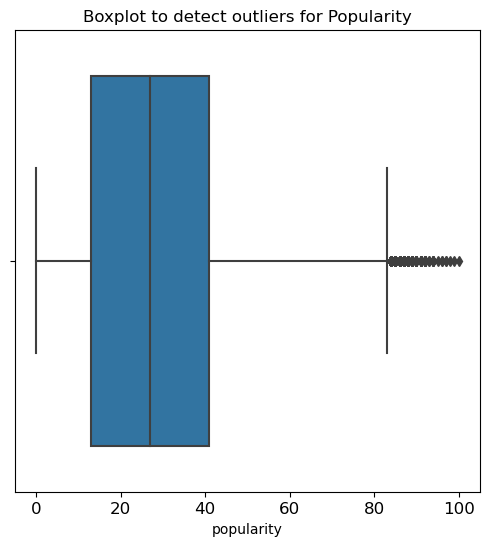

In [88]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Popularity', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_tracks['popularity'])
plt.show()

We can see several points beyond the upper whisker, which are considered outliers. 

These are the songs that have a popularity score significantly higher than the majority of songs in the dataset. 

There don't appear to be any outliers below the lower whisker, as there are no individual points plotted below the bottom whisker.

The plot indicates that there are outliers in terms of songs with very high popularity scores, but no outliers for low popularity scores.


In [89]:
# Compute the 25th percentile value in `popularity`
percentile25 = df_tracks['popularity'].quantile(0.25)

# Compute the 75th percentile value in `popularity`
percentile75 = df_tracks['popularity'].quantile(0.75)

# Compute the interquartile range in `popularity`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `popularity`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `popularity`
outliers = df_tracks[(df_tracks['popularity'] > upper_limit) | (df_tracks['popularity'] < lower_limit)]

# Count how many rows in the data contain outliers in `popularity`
print("Number of rows in the data containing outliers in `popularity`:", len(outliers))

Lower limit: -29.0
Upper limit: 83.0
Number of rows in the data containing outliers in `popularity`: 326


 The results indicate that most songs have a popularity score within the range determined by the calculated lower and upper limits. 
 
 However, there are 326 songs that stand out with a popularity score significantly higher than the rest, which are labeled as outliers. 
 
 There is no mention of songs with popularity below the lower limit because the lower limit is a negative value, which is not possible for a popularity score.

## **Visualisation**

### Create Popular or Not Variable

In [90]:
# create a new variable called ispopular, which is 1 if popularity > 75 and 0 otherwise
df_tracks['ispopular'] = df_tracks['popularity'].apply(lambda x: 1 if x > 65 else 0)

# Get number of song that are popular and not popular
print (df_tracks['ispopular'].value_counts())
print()

# GEt the percentage of songs that are popular and not popular
print (df_tracks['ispopular'].value_counts(normalize=True))

ispopular
0    573519
1     13082
Name: count, dtype: int64

ispopular
0    0.977699
1    0.022301
Name: proportion, dtype: float64


### Analyzed Popular Tracks Based on their Valance

mood
happy    6902
sad      6180
Name: count, dtype: int64


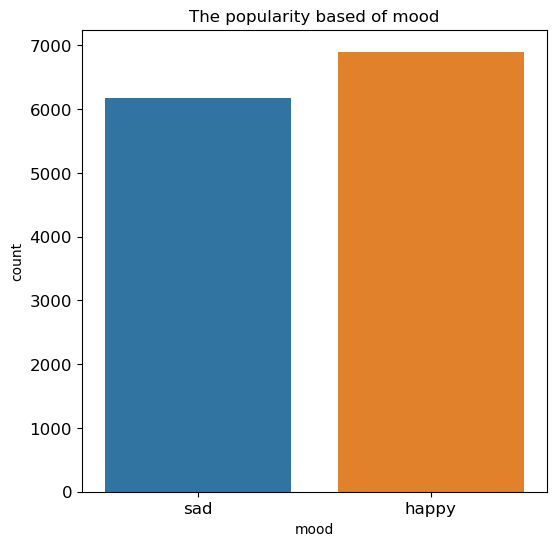

In [91]:
# Create new variable mood based on valence, if valence > 0.5, mood is happy, otherwise sad
df_tracks['mood'] = df_tracks['valence'].apply(lambda x: 'happy' if x > 0.5 else 'sad')

# Get number of song that are happy and sad that are popular
print (df_tracks[df_tracks['ispopular']==1]['mood'].value_counts())

# Visualise the popular tracks based on their mood
plt.figure(figsize=(6,6))
plt.title('The popularity based of mood', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x=df_tracks[df_tracks['ispopular']==1]['mood'])
plt.show()


- **Happy Tracks**: There are a total of 6902 tracks classified as 'happy', indicating a high valence score and a positive, cheerful, or upbeat mood.
- **Sad Tracks**: There are 6180 tracks classified as 'sad', suggesting a low valence score and a mood that may be described as melancholic, somber, or subdued.

### Based on the Amount Year

release_year
2010s    9543
1990s    1969
2000s    1570
Name: count, dtype: int64


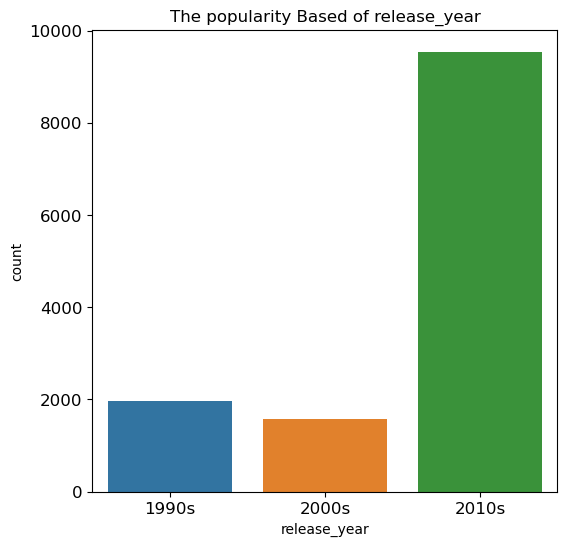

In [92]:
## Create new variable release_year based on release_date with 3 categories: 2010s, 2000s, 1990s
df_tracks['release_year'] = df_tracks['release_date'].apply(lambda x: x.split('-')[0])
df_tracks['release_year'] = df_tracks['release_year'].astype(int)
df_tracks['release_year'] = df_tracks['release_year'].apply(lambda x: '2010s' if x >= 2010 else ('2000s' if x >= 2000 else '1990s'))

# Get number of song that are released in 2010s, 2000s, 1990s that are popular
print (df_tracks[df_tracks['ispopular']==1]['release_year'].value_counts())

# Visualise the popular tracks that are popular based on their release_year
plt.figure(figsize=(6,6))
plt.title('The popularity Based of release_year', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x=df_tracks[df_tracks['ispopular']==1]['release_year'])
plt.show()

The countplot provides insights into the number of popular tracks released across different decades. Here's the summarized count for each period:

- **1990s**: A moderate number of tracks from this decade have gained popularity. The sound of the '90s may be characterized by its diversity, from grunge to pop, which continues to resonate with listeners.
  
- **2000s**: The count increases for this decade, suggesting a growing volume of music that has remained popular over time. The 2000s were marked by the advent of digital music, which may have contributed to the increased accessibility and distribution of tracks.

- **2010s**: This decade shows a significant surge in popular tracks. Advances in streaming services and social media may have played a pivotal role in boosting the reach and popularity of music released during this time.


### Analyzed Tracks based on their Tempo Level

release_year
fast      5664
medium    3822
slow      3596
Name: count, dtype: int64


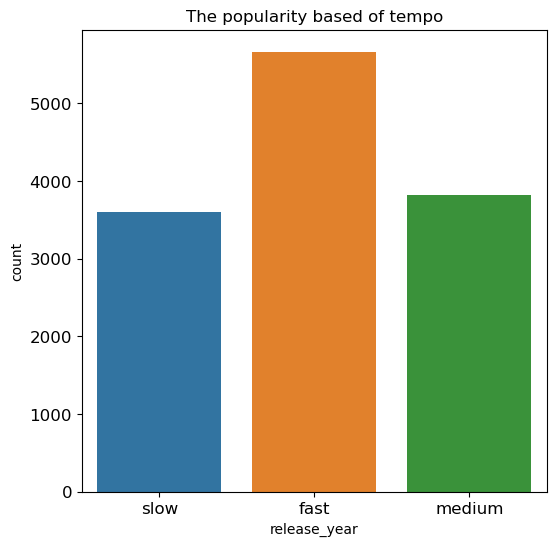

In [93]:
## Creare a new variable called release_year  have 3 levels: slow, medium, fast
# 1. if tempo < 100, then slow
# 2. if tempo >= 100 and tempo < 125, then medium
# 3. if tempo >= 125, then fast
df_tracks['release_year'] = df_tracks['tempo'].apply(lambda x: 'slow' if x < 100 else 'medium' if x < 125 else 'fast')

# Get number of song that are slow, medium, fast that are popular
print (df_tracks[df_tracks['ispopular']==1]['release_year'].value_counts())

# Visualise the popular tracks that are popular based on their release_year
plt.figure(figsize=(6,6))
plt.title('The popularity based of tempo', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x=df_tracks[df_tracks['ispopular']==1]['release_year'])
plt.show()

This countplot shows the distribution of popular tracks categorized by tempo, revealing preferences in tempo for tracks that have gained popularity.

- **Slow**: The count for slow-tempo tracks is substantial, indicating a preference for tracks that may offer a more relaxed and mellow listening experience.
  
- **Medium**: Medium-tempo tracks follow in count, suggesting that they hold a significant place in popular music. This tempo may offer a balance that appeals to listeners who prefer neither too slow nor too fast-paced music.

- **Fast**: Fast-tempo tracks, depicted in orange, have the highest count among the three categories. This indicates a strong preference for energetic and upbeat tracks in popular music, which are often associated with genres such as dance and upbeat pop.

durationlevel
medium    6632
long      3549
short     2901
Name: count, dtype: int64


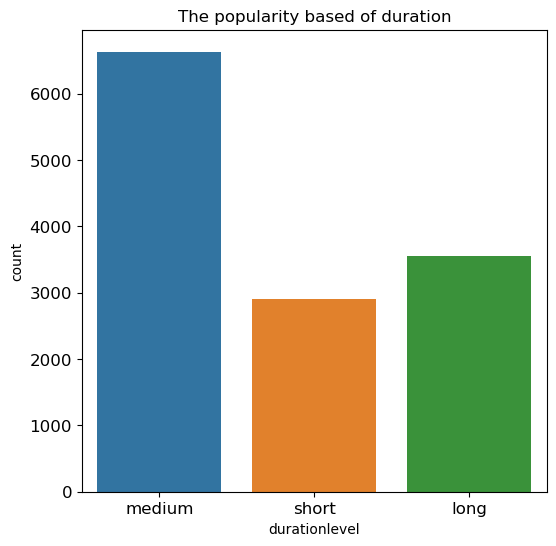

In [94]:
## create new variable called durationlevel have 3 levels: short, medium, long
# 1. if duration < 180, then short
# 2. if duration >= 180 and duration < 240, then medium
# 3. if duration >= 240, then long
df_tracks['durationlevel'] = df_tracks['duration_ms'].apply(lambda x: 'short' if x < 180000 else 'medium' if x < 240000 else 'long')

# Get number of song that are short, medium, long that are popular
print (df_tracks[df_tracks['ispopular']==1]['durationlevel'].value_counts())

# Visualise the popular tracks that are popular based on their durationlevel
plt.figure(figsize=(6,6))
plt.title('The popularity based of duration', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x=df_tracks[df_tracks['ispopular']==1]['durationlevel'])
plt.show()

This countplot visualizes the popularity of tracks in relation to their duration, categorized into 'short', 'medium', and 'long'.

- **Short Duration (≤180s)**: Tracks that are 180 seconds or shorter fall into this category. Despite the brevity, these tracks still capture a significant count, indicating a preference for concise, engaging musical experiences.

- **Medium Duration (~240s)**: This category represents tracks that are approximately 240 seconds in length. The count for medium-duration tracks is the highest, suggesting that this duration strikes a favorable balance for listeners, leading to higher popularity.

- **Long Duration (>240s)**: Tracks exceeding 240 seconds are considered 'long'. The count for long-duration tracks is substantial, reflecting a listener preference for tracks that offer more extended, possibly more complex or immersive, musical journeys.

Let's start to create a stacked boxplot showing `tempolevel` distributions for `energy`, comparing the distribution of song that are popular and not

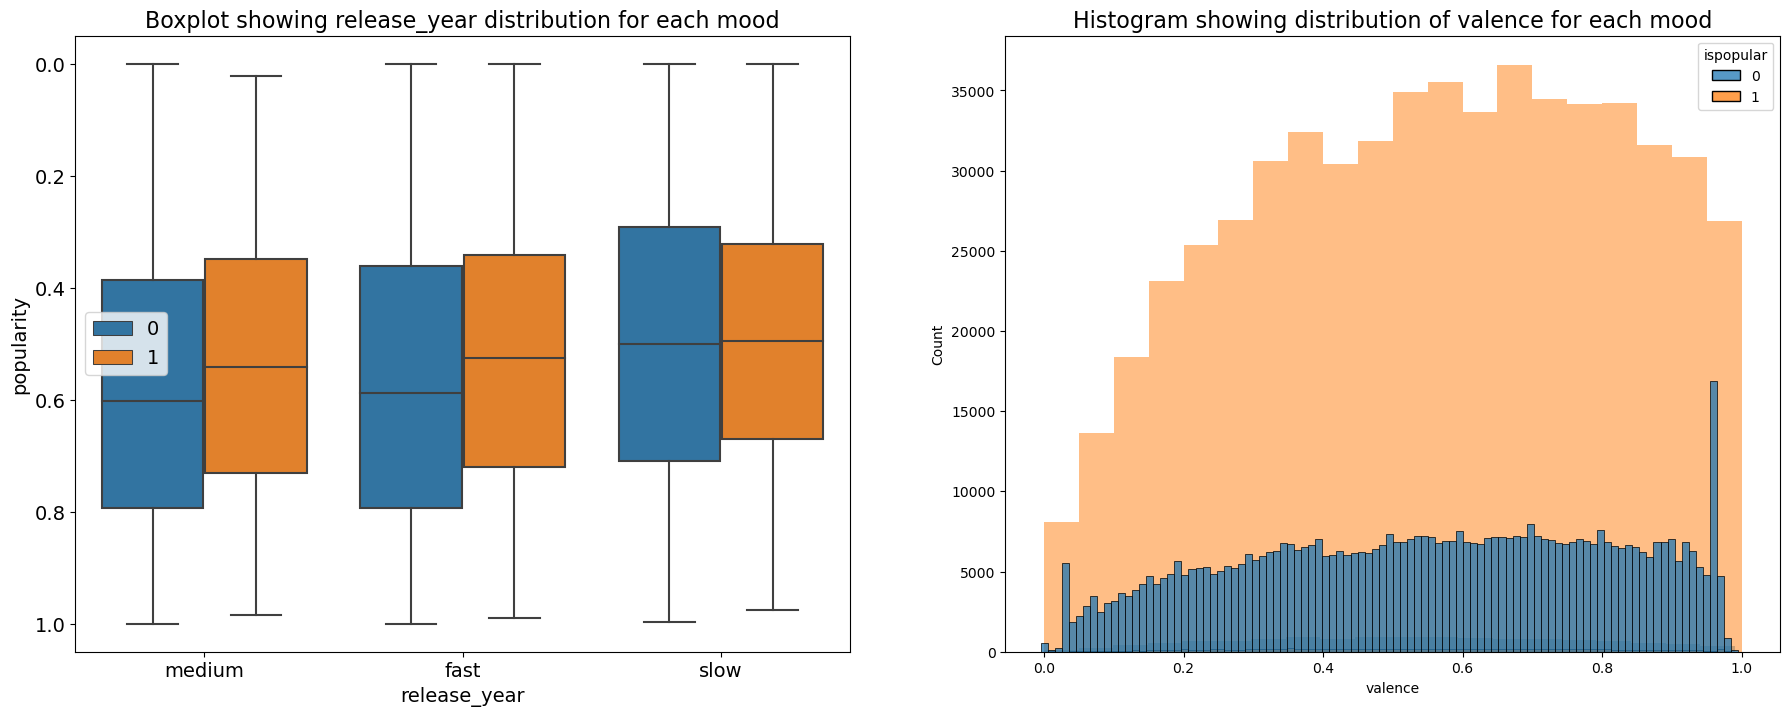

In [95]:
#create a stacked boxplot showing release_year distribution for each mood, comparing the disribution of tracks that are popular and not popular

#set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

#Create boxplot showing release_year distribution for each mood, comparing the disribution of tracks that are popular and not popular
sns.boxplot(x='release_year', y='valence', hue='ispopular', data=df_tracks, ax=ax[0])   
ax[0].set_title('Boxplot showing release_year distribution for each mood', fontsize=16)
ax[0].set_xlabel('release_year', fontsize=14)
ax[0].set_ylabel('popularity', fontsize=14)
ax[0].tick_params(labelsize=14)
ax[0].legend(fontsize=14)
ax[0].invert_yaxis()


#Create histogram showing distribution of valence for each mood, comparing the disribution of tracks that are popular and not popular
popularity = df_tracks[df_tracks['ispopular']==1]['valence']
not_popularity = df_tracks[df_tracks['ispopular']==0]['valence']
ax[1].hist(popularity, bins=20, alpha=0.5, label='popular')
ax[1].hist(not_popularity, bins=20, alpha=0.5, label='not popular')
sns.histplot(df_tracks, x='valence', hue='ispopular', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Histogram showing distribution of valence for each mood', fontsize=16)
plt.show()


The left boxplot illustrates the distribution of popular and non-popular tracks across different release decades (1990s, 2000s, 2010s). Each boxplot is segmented by popularity, denoted by '0' for not popular and '1' for popular.

- The median popularity appears to shift over the decades, which might suggest changes in the music industry or listener preferences.
- The interquartile range (IQR) in each decade could indicate the consistency of track popularity within that time period.
- Outliers, if present, would suggest tracks that broke the typical popularity mold for their respective era.

### Valence Distribution of Tracks
The histogram on the right shows the distribution of valence scores across all tracks. Valence measures the musical positiveness conveyed by a track.

- The distribution is skewed towards higher valence scores, indicating a prevalence of tracks with a positive, happy, or cheerful mood.
- The number of tracks decreases as the valence score approaches either extreme, which may reflect a preference for more emotionally balanced music.


Text(0.5, 1.0, 'Scatter plot of valence vs energy')

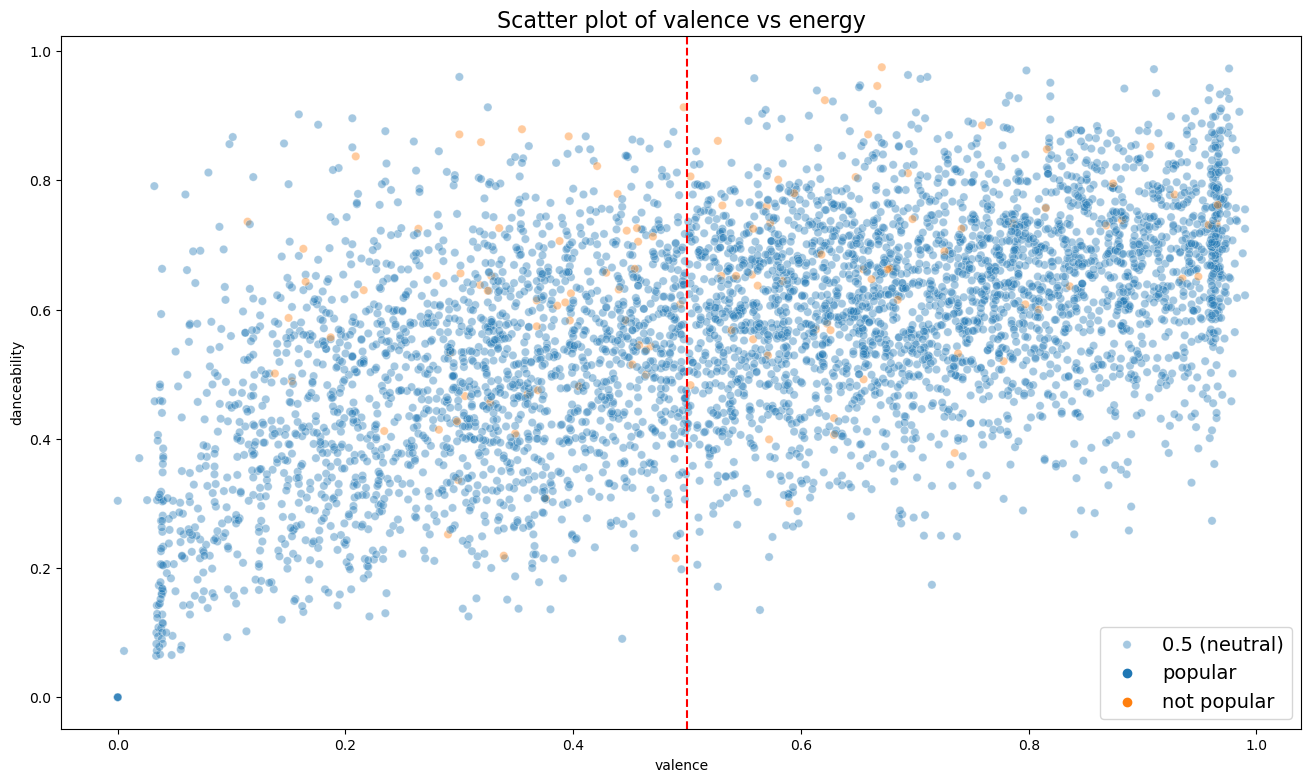

In [96]:
#Create sample data for scatter plot of valence vs energy to reduce the number of points plotted using downsample
sample_df_tracks = df_tracks.sample(n=5000, random_state=1)

# Create a scatter plot  of `valence`  vs `energy`, comparing the distribution of tracks that are popular and not popular
plt.figure(figsize=(16,9))
sns.scatterplot(x='valence', y='danceability', hue='ispopular', data=sample_df_tracks, alpha=0.4)
plt.axvline(x=0.5, color='red', linestyle='--', label='0.5 (neutral)')
plt.legend(labels=['0.5 (neutral)', 'popular', 'not popular'], fontsize=14)
plt.title('Scatter plot of valence vs energy', fontsize=16)


In [97]:
# calculate mean and median of valence of tracks that are popular and not popular
df_tracks.groupby('ispopular')['valence'].agg(['mean', 'median']) 

,mean,median
ispopular,,
0,0.552996,0.565
1,0.522046,0.522


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'explicit'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'key'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'mode'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'acousticness'),
 Text(10.5, 0, 'instrumentalness'),
 Text(11.5, 0, 'liveness'),
 Text(12.5, 0, 'valence'),
 Text(13.5, 0, 'tempo'),
 Text(14.5, 0, 'time_signature'),
 Text(15.5, 0, 'ispopular')]

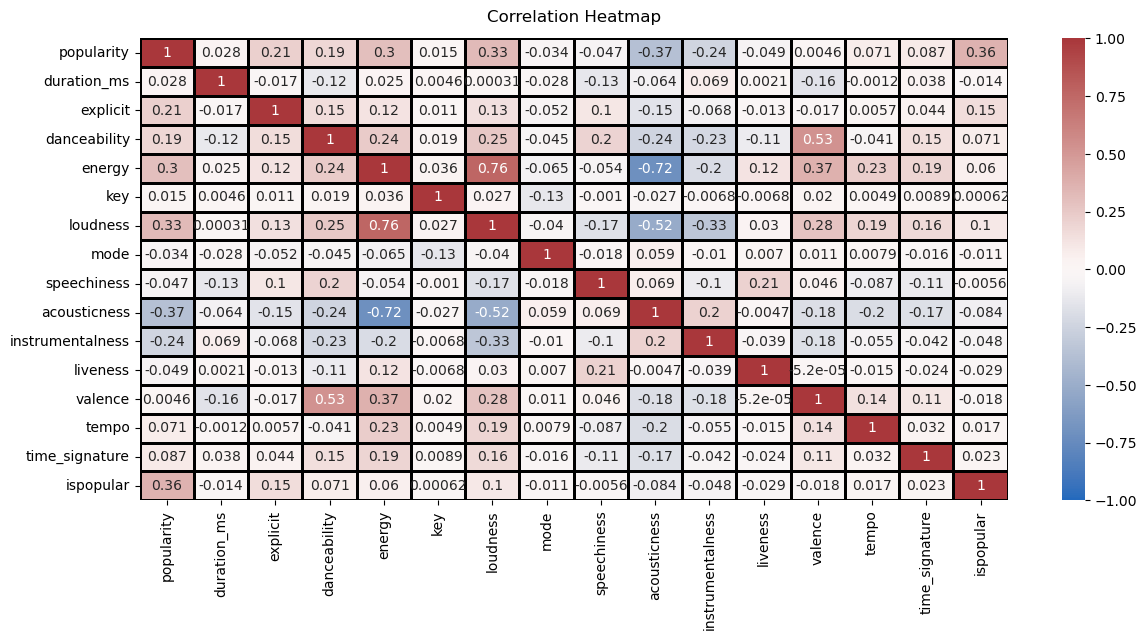

In [98]:
# Drop non-numeric columns
numeric_columns = df_tracks.select_dtypes(include=np.number).columns
df_tracks_numeric = df_tracks[numeric_columns]

# Calculate correlation matrix
correlation_matrix = df_tracks_numeric.corr(method='pearson')

# Plot correlation heatmap
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, vmin=-1, center=0, cmap='vlag', linewidths=1, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)


The heatmap visualizes the correlation coefficients between various audio features of tracks, providing insights into how these features relate to each other and to track popularity.

### Key Observations
- **Popularity and Loudness**: There is a moderate positive correlation between track popularity and loudness, suggesting that louder tracks tend to be more popular.
- **Energy and Loudness**: A strong positive correlation is observed between energy and loudness, which indicates that tracks with higher energy levels are usually louder.
- **Danceability and Valence**: There is a significant positive correlation between danceability and valence, hinting that tracks that are more danceable tend to have a happier or more positive mood.
- **Acousticness and Energy**: A strong negative correlation between acousticness and energy suggests that tracks with higher acousticness tend to have lower energy levels.
- **Instrumentalness and Acousticness**: A moderate positive correlation indicates that tracks with more instrumental content are likely to be more acoustic.

### Insights for Music Industry
- These correlations can inform music producers and artists about the combination of features that could contribute to a track's success.
- Music platforms might leverage this information to refine algorithms for music recommendation and playlist generation.

Text(0.5, 1.0, 'Loudness vs Energy')

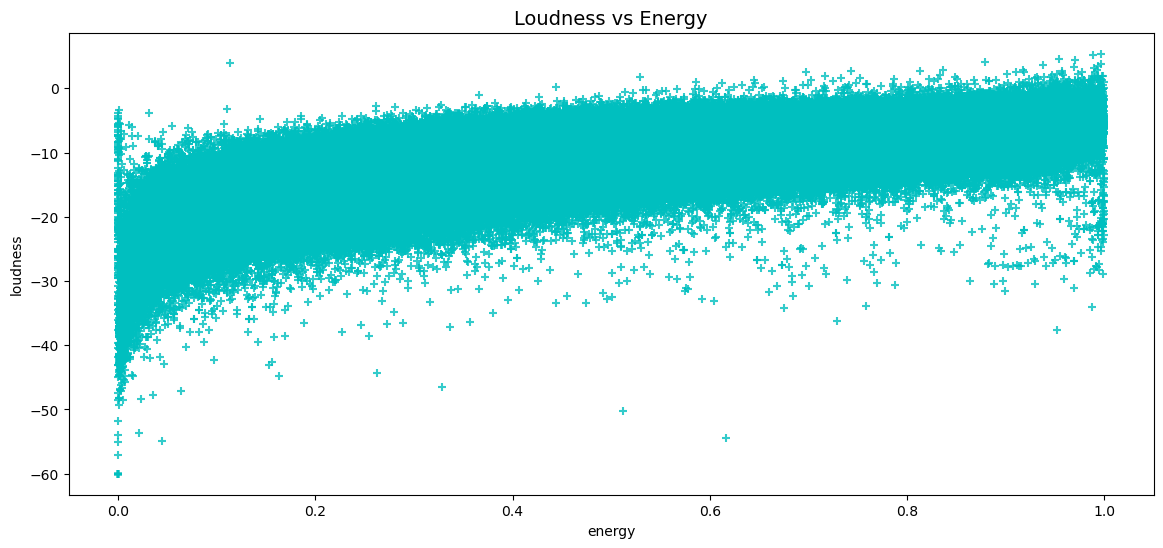

In [99]:
plt.figure(figsize=(14,6))
sns.regplot(data= df_tracks, y='loudness', x='energy', color='c', marker='+')
plt.title('Loudness vs Energy', fontsize=14)

The scatter plot illustrates the relationship between the 'loudness' and 'energy' attributes of a collection of tracks.

### Observations
- A positive correlation between loudness and energy is evident, as tracks with higher energy tend to have higher loudness levels.
- The dispersion of points suggests that while the relationship is generally linear, there are variations that could be influenced by other factors such as genre, recording technology, or artistic intent.

/var/folders/fm/chgvqmmn79z3q1_f8bcvsdvh0000gn/T/ipykernel_18808/2781375614.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


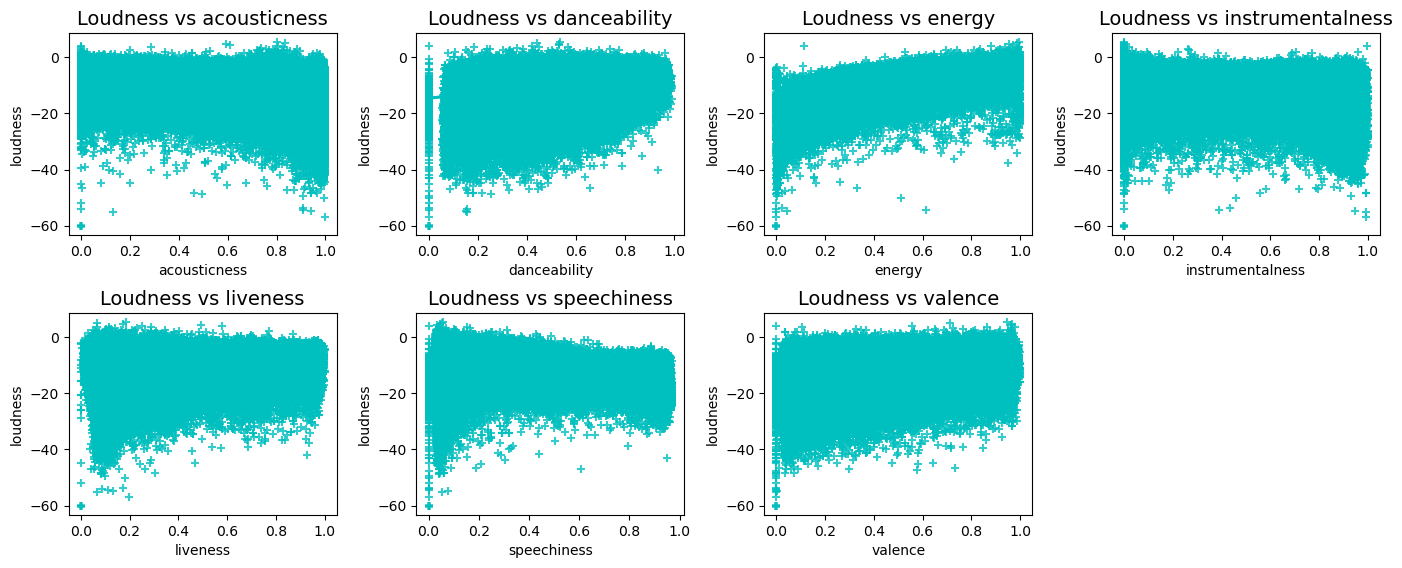

In [100]:
# a loop for plotting multiple regplot 
plt.figure(figsize=(14,6))
for i, col in enumerate(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']):
    plt.subplot(2,4,i+1)
    sns.regplot(data= df_tracks, y='loudness', x=col, color='c', marker='+')
    plt.title('Loudness vs {}'.format(col), fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)


## **MODEL BUILDING**

### Identify the type of prediction task

The goal is to predict whether a track is popular or not, which is a categorical outcome variable. So, this task involve `classification`. More specifically, this involve binary classification, since the outcome variable `ispopular` can be either 1(popular) or 0(not popular)

### Identify the type of Model

Since the variable we want to predict is categorical, we could either build a Logistic Regression Model, or a Tree-Based Machine Learning Model

#### Logistic Regression

Note that binomial logistic regression suits the task because it involves binary classification. 

Before splitting the data, encode the non-numeric variable.

In [101]:
#encode all the non-numeric columns
df_enc = df_tracks.copy()

#List all the column that are not an ordinal numeric category
non_numeric_columns = ['id', 'name', 'artists', 'release_date', 'release_year', 'durationlevel', 'mood']

# Encode the non_numeric_columns as an ordinal numeric category
for col in non_numeric_columns:
    df_enc[col] = df_enc[col].astype('category').cat.codes

#Dummy encode
# df_enc = pd.get_dummies(df_enc, drop_first=False)

#drop id_artists column
df_enc.drop(columns=['id_artists'], inplace=True)

#display the first 5 rows of the encoded dataframe
df_enc.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,ispopular,mood,release_year,durationlevel
0,240488,62328,6,126903,0,103290,3,0.645,0.4450,0,...,0.674,0.7440,0.151,0.127,104.851,3,0,1,1,2
1,2702,60987,0,98200,0,32586,7,0.695,0.2630,0,...,0.797,0.0000,0.148,0.655,102.009,1,0,0,1,2
2,9299,377628,0,181640,0,44116,4,0.434,0.1770,1,...,0.994,0.0218,0.212,0.457,130.418,5,0,1,0,1
3,10702,106033,0,176907,0,44116,4,0.321,0.0946,7,...,0.995,0.9180,0.104,0.397,169.980,3,0,1,0,2
4,11676,198883,0,163080,0,25189,1,0.402,0.1580,3,...,0.989,0.1300,0.311,0.196,103.220,4,0,1,1,2


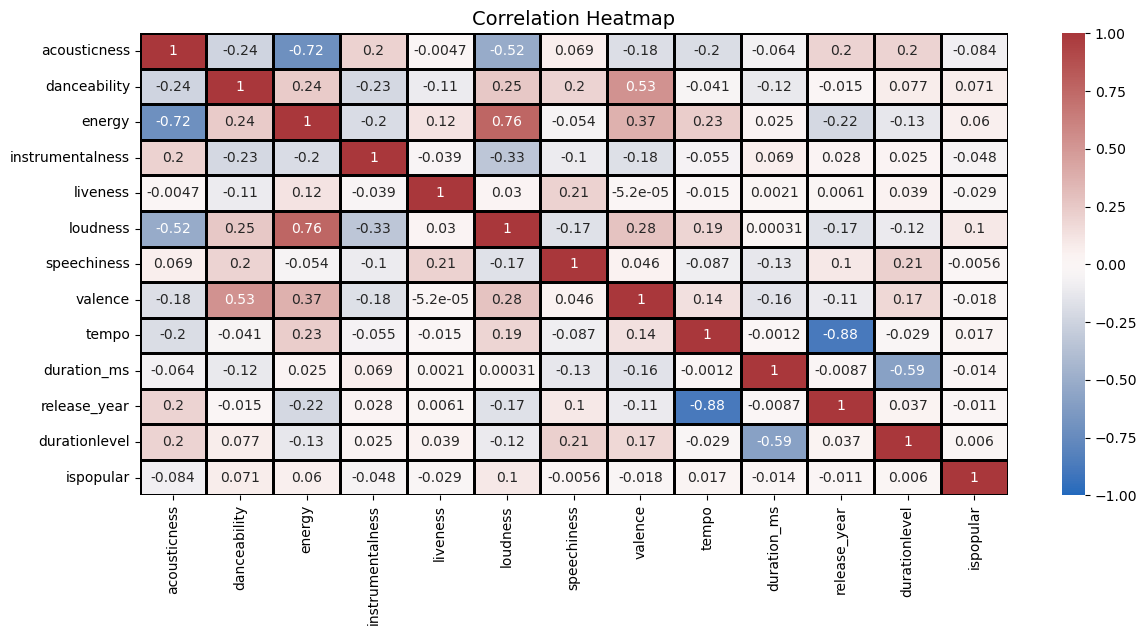

In [102]:
# Create a heatmap to visualise how the variables are correlated to each other
plt.figure(figsize=(14,6))
sns.heatmap(df_enc[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'duration_ms', 'release_year', 'durationlevel', 'ispopular']].corr(), annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1, linecolor='black')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

### Notable Correlations
- **Energy and Acousticness**: A strong negative correlation (-0.72), suggesting that tracks with higher energy tend to have less acousticness.
- **Loudness and Energy**: A strong positive correlation (0.76), indicating that louder tracks are often more energetic.
- **Danceability and Valence**: A moderate positive correlation (0.53), implying that more danceable tracks are likely to have a higher valence score.
- **Duration and Release Year**: A moderate positive correlation (0.59) between the track's duration and its release year may indicate that more recent tracks tend to be longer.

Logistic Regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure that were identified earlier

In [103]:
# Remove outliers in `popularity`
df_logreg = df_enc[(df_enc['popularity'] <= upper_limit) & (df_tracks['popularity'] >= lower_limit)]

df_logreg.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,ispopular,mood,release_year,durationlevel
0,240488,62328,6,126903,0,103290,3,0.645,0.4450,0,...,0.674,0.7440,0.151,0.127,104.851,3,0,1,1,2
1,2702,60987,0,98200,0,32586,7,0.695,0.2630,0,...,0.797,0.0000,0.148,0.655,102.009,1,0,0,1,2
2,9299,377628,0,181640,0,44116,4,0.434,0.1770,1,...,0.994,0.0218,0.212,0.457,130.418,5,0,1,0,1
3,10702,106033,0,176907,0,44116,4,0.321,0.0946,7,...,0.995,0.9180,0.104,0.397,169.980,3,0,1,0,2
4,11676,198883,0,163080,0,25189,1,0.402,0.1580,3,...,0.989,0.1300,0.311,0.196,103.220,4,0,1,1,2


Isolation for Outcome Variable

In [104]:
# Isolate the dependent variable
y = df_logreg['ispopular']

# Select the feature we want to use in the model
X = df_logreg.drop('ispopular', axis=1)


Select Feature

In [105]:
#drop name and id column
X.drop(columns=['name', 'id'], inplace=True)

#drip explicit column
X.drop(columns=['explicit'], inplace=True)

In [106]:
X.head()

,popularity,duration_ms,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood,release_year,durationlevel
0,6,126903,103290,3,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1,1,2
1,0,98200,32586,7,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0,1,2
2,0,181640,44116,4,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1,0,1
3,0,176907,44116,4,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1,0,2
4,0,163080,25189,1,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1,1,2


In [107]:
X.head()

,popularity,duration_ms,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood,release_year,durationlevel
0,6,126903,103290,3,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1,1,2
1,0,98200,32586,7,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0,1,2
2,0,181640,44116,4,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1,0,1
3,0,176907,44116,4,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1,0,2
4,0,163080,25189,1,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1,1,2


Split Data

In [108]:
from sklearn.model_selection import train_test_split

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

apply SMOTE

In [109]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Construct Logistic Regression to Fit Training Dataset

In [110]:
# Construct LogisticRegression model
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train_smote, y_train_smote)

In [111]:
#Use the logistic regression model to predict the test data
y_pred = log_clf.predict(X_test)

Confussion Matrix

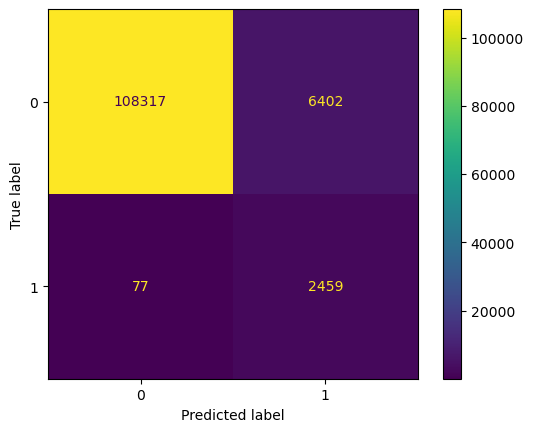

In [112]:
# Compute values for the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
log_cm = confusion_matrix(y_test, y_pred, labels= log_clf.classes_)

# Create a display of the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot the confusion matrix
log_disp.plot(values_format='')

plt.show()

The confusion matrix visualizes the performance of a logistic regression model used to predict track popularity (`ispopular`).

### Model Details
- The model predicts whether a track is popular (`1`) or not (`0`).
- `y` represents the actual label indicating the track's popularity.
- `X` includes the features used to predict popularity, excluding the target variable `ispopular`.

### Confusion Matrix Interpretation
- **True Negative (TN)**: The top left cell (yellow) with 142,670 represents tracks correctly predicted as not popular.
- **False Positive (FP)**: The top right cell (purple) with 752 indicates tracks incorrectly predicted as popular when they are not.
- **False Negative (FN)**: The bottom left cell (dark purple) with 1,412 shows tracks incorrectly predicted as not popular when they are.
- **True Positive (TP)**: The bottom right cell (purple) with 1,735 represents tracks correctly predicted as popular.

### Insights
- The model has a high number of true negatives, suggesting it is quite conservative in predicting a track as popular.
- The number of false negatives and false positives shows the model's limitations and provides opportunities for improvement.
- Precision and recall metrics derived from these values can further describe the model's performance.

### Implications for Model Improvement
- The model might be improved by feature engineering, hyperparameter tuning, or trying different algorithms.
- Further analysis can help understand the causes of misclassification and guide the refinement of the model.

In [113]:
# Create classification report for the logistic regression model
from sklearn.metrics import classification_report
target_names = ['Predicted not popular', 'Predicted popular']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Predicted not popular       1.00      0.94      0.97    114719
    Predicted popular       0.28      0.97      0.43      2536

             accuracy                           0.94    117255
            macro avg       0.64      0.96      0.70    117255
         weighted avg       0.98      0.94      0.96    117255



Tree Based Model

In [114]:
#isolating the dependent variable
y = df_enc['ispopular']

#display the first 5 rows of the dependent variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: ispopular, dtype: int64

In [115]:
#select the feature we want to use in the model
X = df_enc.drop('ispopular', axis=1)

#display the first 5 rows of the feature
X.head()

#drop name and id column
X.drop(columns=['name', 'id'], inplace=True)

In [116]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [117]:
from sklearn.model_selection import GridSearchCV
# initialise the decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# assign a dictionary of hyperparameters to serach over 
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

#assign a dictionary of scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#initialise the gridsearch
dt_gridsearch = GridSearchCV(estimator=dt_clf, param_grid=cv_params, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

In [132]:
X_train.head()

,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood,release_year,durationlevel
242846,43,207120,0,18061,10698,0.593,0.6330,6,-11.127,0,0.0302,0.0208,0.000002,0.0582,0.950,104.275,4,0,1,1
456555,56,170277,0,69802,19500,0.579,0.0945,3,-18.377,1,0.0396,0.7050,0.000004,0.0817,0.353,123.994,4,1,1,2
332446,45,218733,0,46253,13137,0.593,0.4600,11,-6.649,0,0.0280,0.5710,0.000298,0.3530,0.618,115.347,4,0,1,1
309355,37,218453,0,1568,10451,0.592,0.7770,1,-11.556,1,0.0316,0.0716,0.946000,0.0642,0.417,139.973,4,1,0,1
4098,0,181910,0,17294,78,0.473,0.1590,6,-14.066,0,0.0405,0.9840,0.241000,0.1400,0.279,119.121,4,1,1,1


In [126]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [127]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 47.9 s, sys: 2.44 s, total: 50.3 s
Wall time: 50.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'f1', 'recall', 'roc_auc', 'accuracy'})

Identify the optimal values

In [128]:
# check the best parameters
tree2.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

Identify best AUC Score

In [129]:
# Chech best AUC score
tree2.best_score_

1.0

In [134]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision  recall   F1  accuracy  auc
0  decision tree cv        1.0     1.0  1.0       1.0  1.0
               model  precision  recall   F1  accuracy  auc
0  decision tree2 cv        1.0     1.0  1.0       1.0  1.0


### Feature Engineering

We might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when we use data to train wer model that should not be used during training, either because it appears in the test data or because it's not data that we'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

we could proceed by dropping `id`, `name`, `explicit`, `popularity` and creating a new feature that roughly captures whether a song is so long or so short. we could call this new feature too_much. It will be a binary variable.

In [121]:
df_enc.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,ispopular,mood,release_year,durationlevel
0,240488,62328,6,126903,0,103290,3,0.645,0.4450,0,...,0.674,0.7440,0.151,0.127,104.851,3,0,1,1,2
1,2702,60987,0,98200,0,32586,7,0.695,0.2630,0,...,0.797,0.0000,0.148,0.655,102.009,1,0,0,1,2
2,9299,377628,0,181640,0,44116,4,0.434,0.1770,1,...,0.994,0.0218,0.212,0.457,130.418,5,0,1,0,1
3,10702,106033,0,176907,0,44116,4,0.321,0.0946,7,...,0.995,0.9180,0.104,0.397,169.980,3,0,1,0,2
4,11676,198883,0,163080,0,25189,1,0.402,0.1580,3,...,0.989,0.1300,0.311,0.196,103.220,4,0,1,1,2


In [122]:
# Drop id, name, explicit column
df2 = df_enc.drop(columns=['id', 'name', 'explicit', 'popularity'])
df2.head()

,duration_ms,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,ispopular,mood,release_year,durationlevel
0,126903,103290,3,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,0,1,1,2
1,98200,32586,7,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0,0,1,2
2,181640,44116,4,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,0,1,0,1
3,176907,44116,4,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,0,1,0,2
4,163080,25189,1,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,0,1,1,2


### Decision Tree Splits

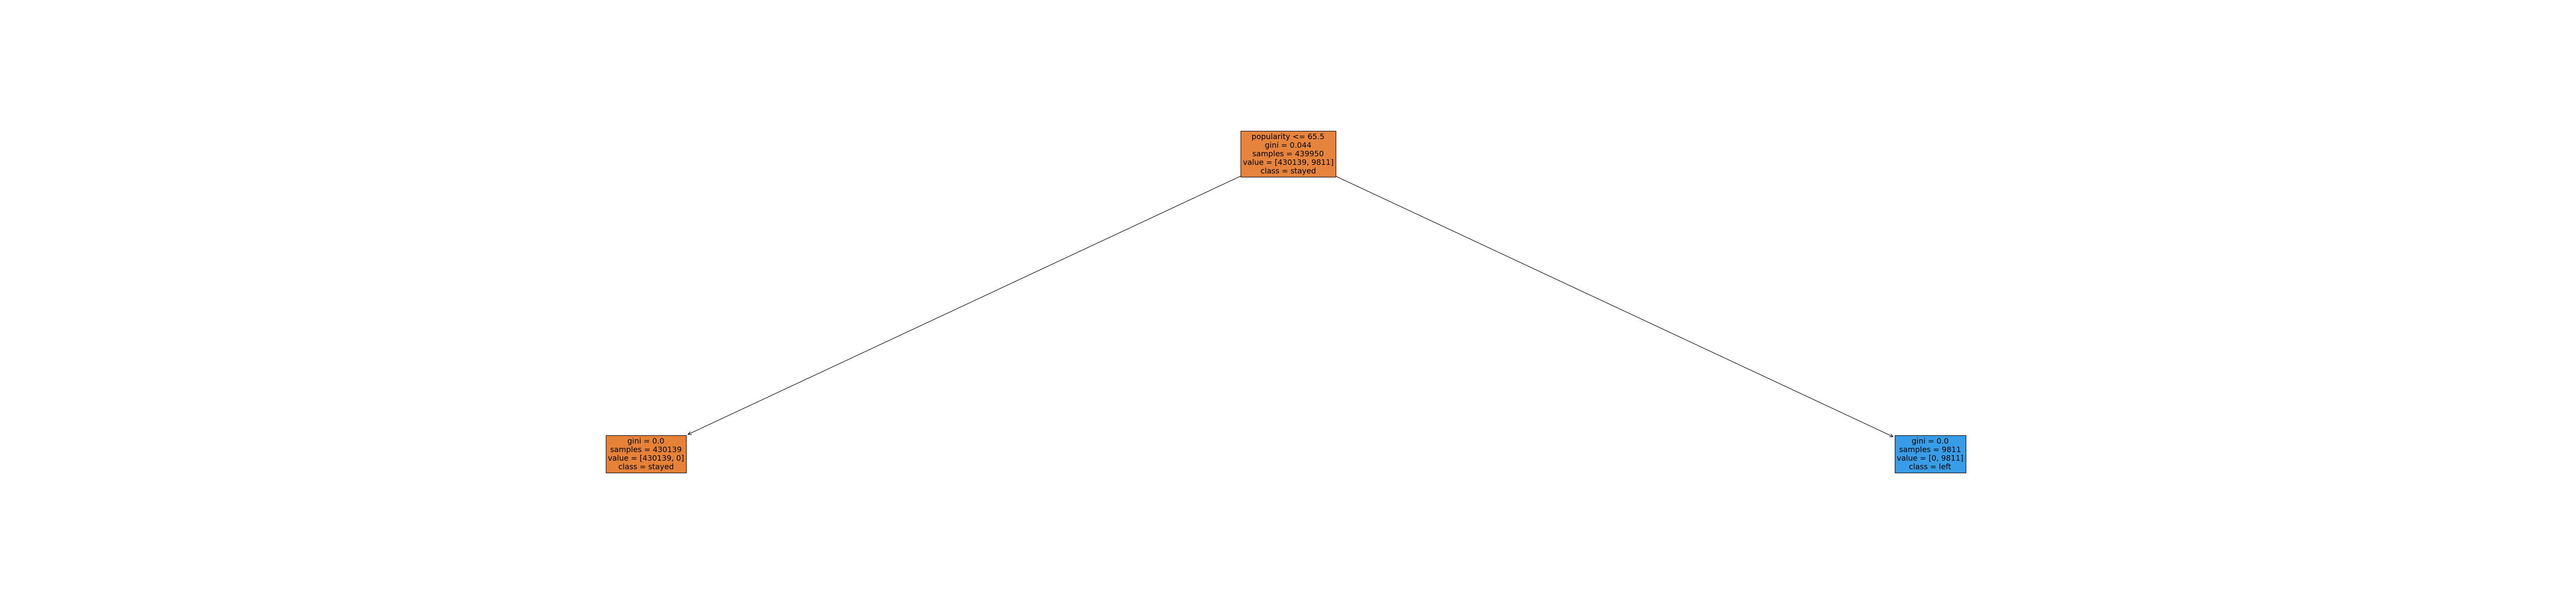

In [130]:
from sklearn.tree import plot_tree
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### Feature Importance

In [135]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(dt_gridsearch.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
popularity,1.0


### Decision Tree Splits

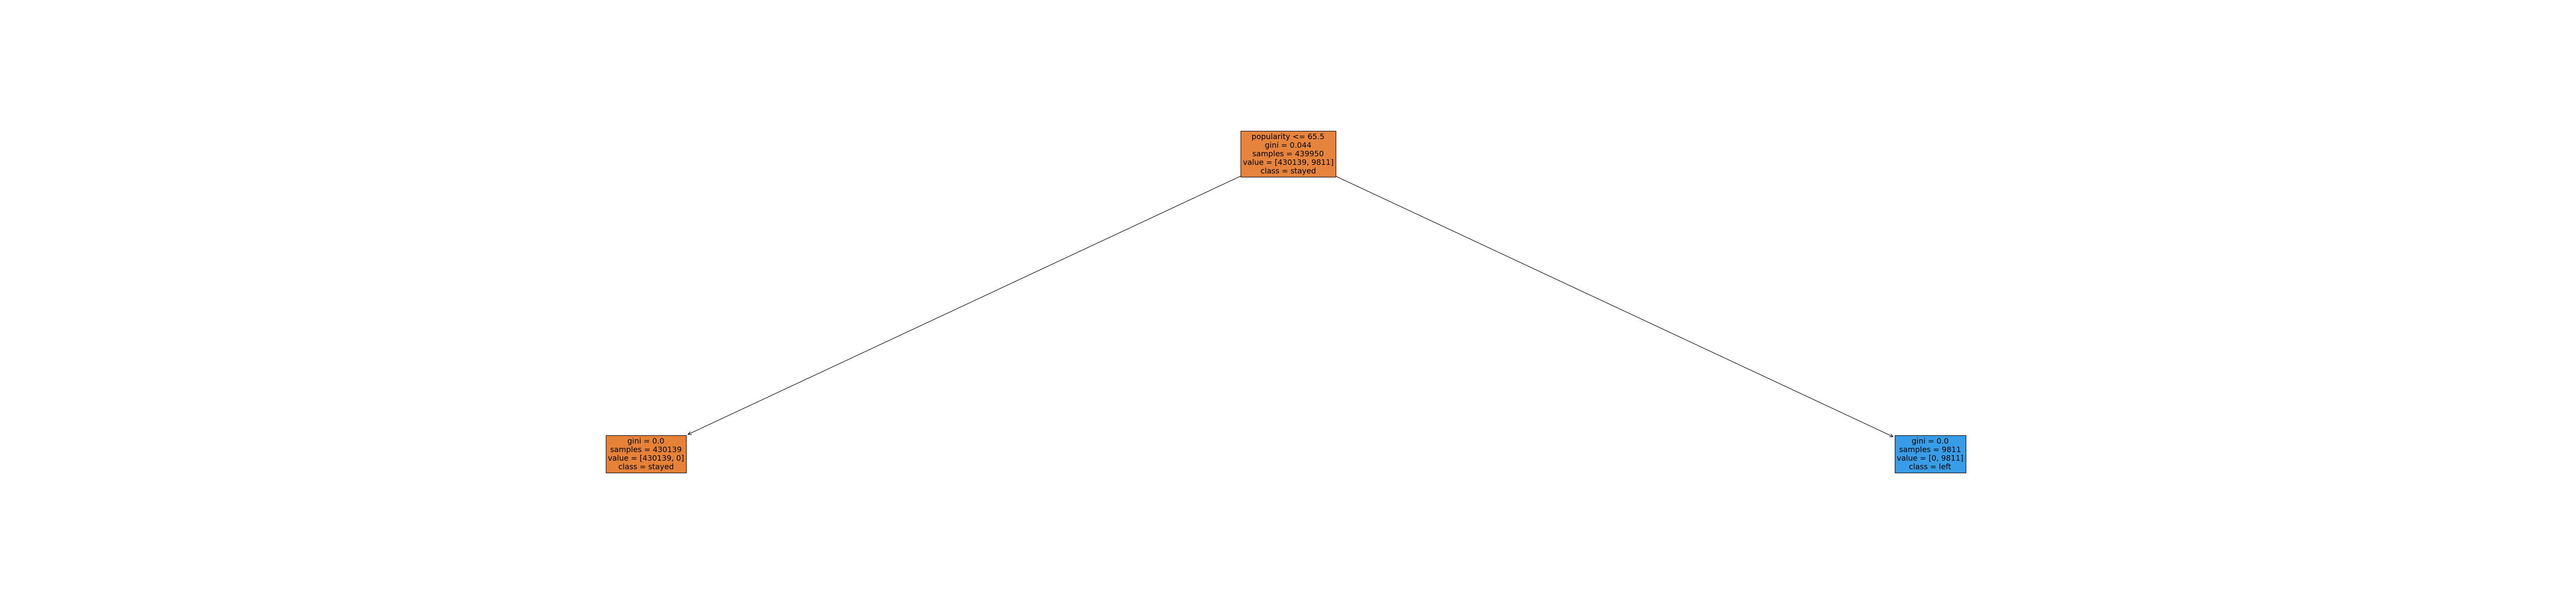

In [136]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(dt_gridsearch.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### Decision Tree Feature Importance

In [137]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(dt_gridsearch.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
popularity,1.0


Barplot Feature Importance

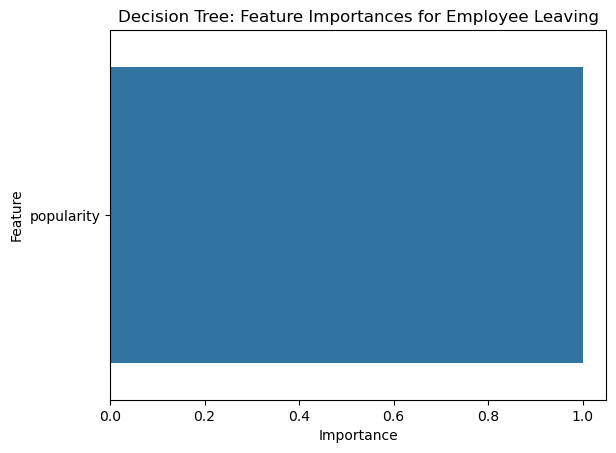

In [138]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Recall Evaluation Metrics

### AUC - Area Under the ROC Curve
- **Definition**: AUC stands for "Area Under the ROC (Receiver Operating Characteristic) Curve". It measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).
- **Interpretation**: It's considered the probability that the model ranks a random positive example more highly than a random negative example. An AUC of 0.5 suggests no discriminative ability, whereas an AUC of 1.0 represents a perfect model.

### Precision
- **Definition**: Precision measures the proportion of data points our model predicts as positive that are actually positive. It is the ratio of true positives to the sum of true and false positives.
- **Interpretation**: High precision indicates that an algorithm returned substantially more relevant results than irrelevant ones.

### Recall
- **Definition**: Recall measures the proportion of actual positives that are correctly classified by our model. It is the ratio of true positives to the sum of true positives and false negatives.
- **Interpretation**: High recall indicates that an algorithm found most of the positive examples in the dataset.

### Accuracy
- **Definition**: Accuracy measures the proportion of data points our model classifies correctly, out of all the predictions made.
- **Interpretation**: High accuracy indicates that our model is performing well across all classes, both positive and negative.

### F1-score
- **Definition**: The F1-score is the harmonic mean of precision and recall. It's an aggregation of both metrics, giving you a single score that balances both concerns.
- **Interpretation**: 

## Result & Evaluation

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.


**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

- Cap the number of projects that employees can work on.
- Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
- Either reward employees for working longer hours, or don't require them to do so.
- If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
- High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

### Future Consideration


It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.